# DEC MINI PROJECT- Yield Prediction

1. Importing the necessary libraries and dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import pickle
from sklearn.linear_model import LinearRegression

C:\Users\Dell\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\Archive\crop_production.csv")

df.shape

(246091, 7)

# Data Preprocessing

In [3]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [4]:
# Droping Nan Values
data = df.dropna()
print(data.shape)

(242361, 7)


In [5]:
for i in data.columns:
    print("column name :",i)
    print("No. unique values of column :",len(data[i].unique()))
    print()

column name : State_Name
No. unique values of column : 33

column name : District_Name
No. unique values of column : 646

column name : Crop_Year
No. unique values of column : 19

column name : Season
No. unique values of column : 6

column name : Crop
No. unique values of column : 124

column name : Area
No. unique values of column : 38391

column name : Production
No. unique values of column : 51627



# Data Visualization

1. Understand the percent of production of each state/year across the entire dataset

In [6]:
data

State_Name District_Name  Crop_Year       Season  \
0       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
...                             ...           ...        ...          ...   
246086                  West Bengal       PURULIA       2014  Summer        
246087                  West Bengal       PURULIA       2014  Summer        
246088                  West Bengal       PURULIA       2014  Whole Year    
246089                  West Bengal       PURULIA       2014  Winter        
246090                  West Bengal       PURULIA       2014  Winter        

                       Crop      Area  Production  
0                  Arecanut    1254.0      2000.0  
1       Other Kharif pulses       2.0         1.0  
2                      Rice     102.0       321.0  
3                    Banana     176.0       641.0  
4                 Cashewnut     720.0       165.0  
...                     ...       ...         ...  
246086                 Rice     306.0       801.0  
246087              Sesamum     627.0       463.0  
246088            Sugarcane     324.0     16250.0  
246089                 Rice  279151.0    597899.0  
246090              Sesamum     175.0        88.0  

[242361 rows x 7 columns]

In [7]:
sum_maxp = data["Production"].sum()
data["percent_of_production"] = data["Production"].map(lambda x:(x/sum_maxp)*100)

C:\Users\Dell\AppData\Local\Temp\ipykernel_15612\1048416122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["percent_of_production"] = data["Production"].map(lambda x:(x/sum_maxp)*100)


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Crop_Year', ylabel='Production'>

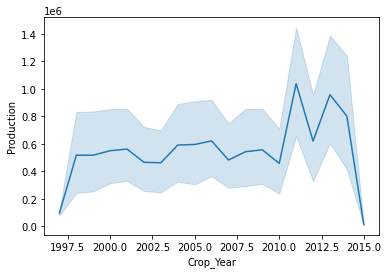

In [8]:
sns.lineplot(data["Crop_Year"],data["Production"])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


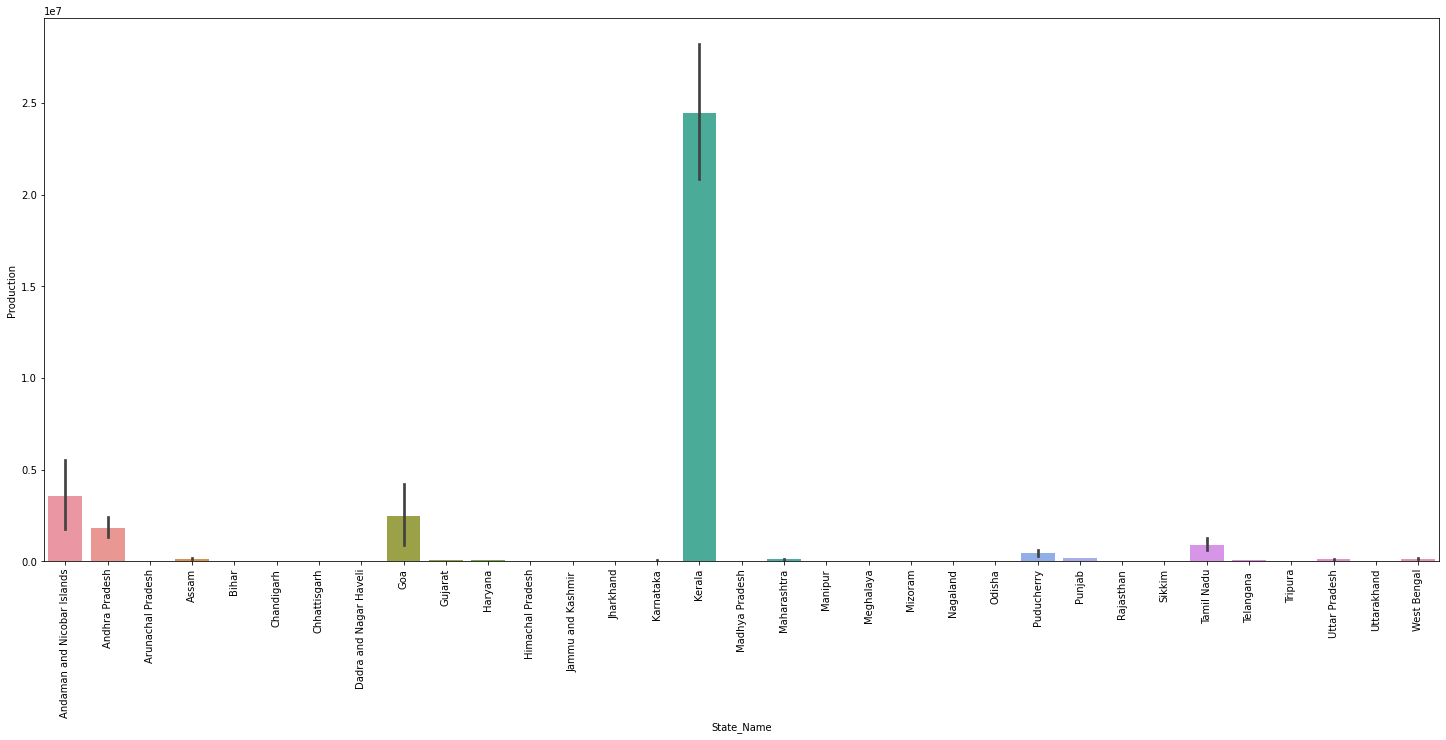

In [9]:
plt.figure(figsize=(25,10))
sns.barplot(data["State_Name"],data["Production"])
plt.xticks(rotation=90)
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Season', ylabel='Production'>

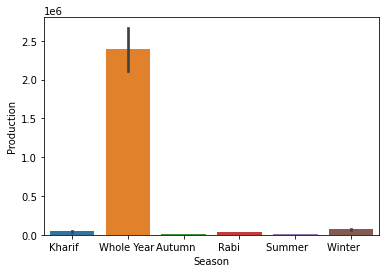

In [10]:
sns.barplot(data["Season"],data["Production"])

# Crop Specific Visualization

## MAIZE

In [11]:
maize_df = data[data["Crop"]=="Maize"]
print(maize_df.shape)
maize_df[:3]

(13787, 8)


State_Name             District_Name  Crop_Year  \
71   Andaman and Nicobar Islands                  NICOBARS       2010   
120  Andaman and Nicobar Islands  NORTH AND MIDDLE ANDAMAN       2010   
194  Andaman and Nicobar Islands            SOUTH ANDAMANS       2010   

          Season   Crop   Area  Production  percent_of_production  
71   Rabi         Maize   3.84       18.22           1.290587e-08  
120  Rabi         Maize  86.70       96.40           6.828350e-08  
194  Rabi         Maize  73.00      253.00           1.792088e-07

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Season', ylabel='Production'>

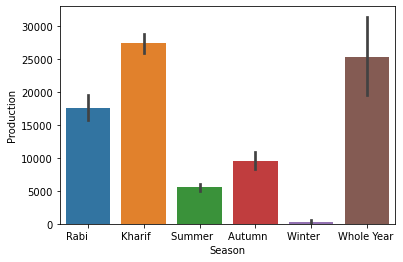

In [12]:
sns.barplot("Season","Production",data=maize_df)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


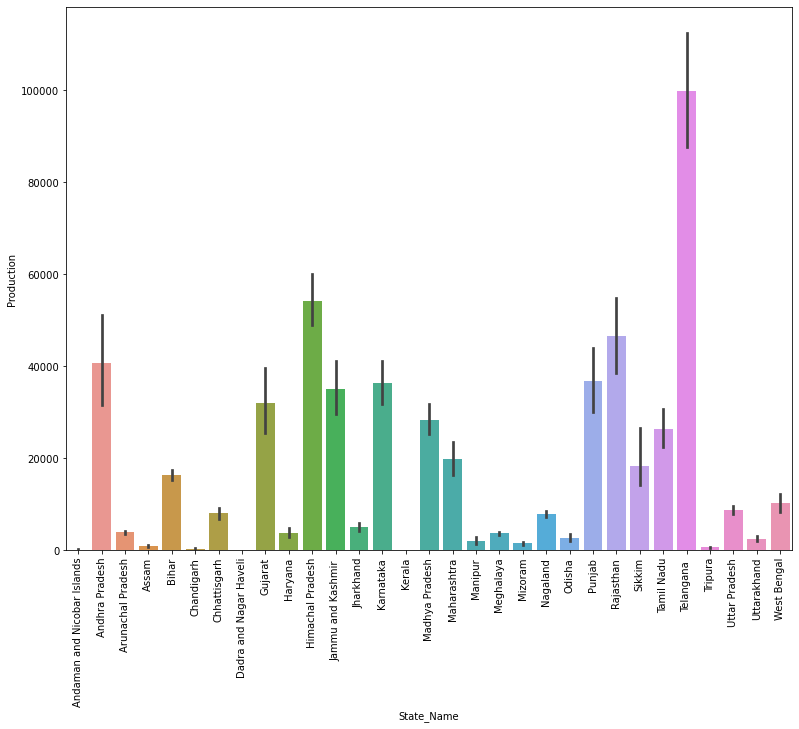

In [13]:
plt.figure(figsize=(13,10))
sns.barplot("State_Name","Production",data=maize_df)
plt.xticks(rotation=90)
plt.show()

## Sugarcane

In [14]:
scane_df = data[data["Crop"]=="Sugarcane"]
print(scane_df.shape)

(7827, 8)


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Season', ylabel='Production'>

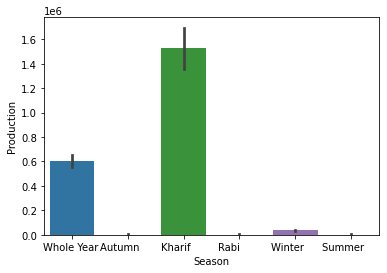

In [15]:
sns.barplot("Season","Production",data=scane_df)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


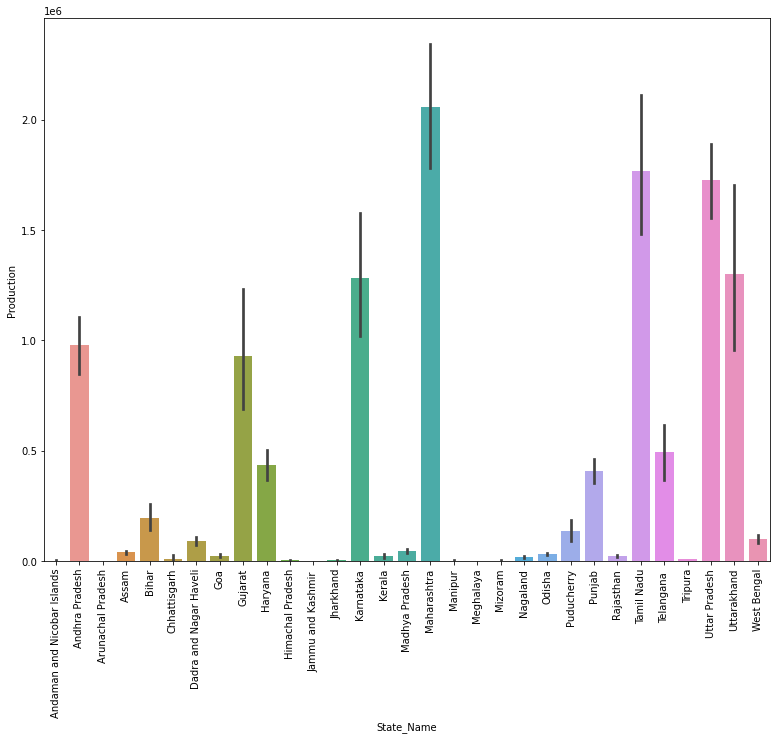

In [16]:
plt.figure(figsize=(13,10))
sns.barplot("State_Name","Production",data=scane_df)
plt.xticks(rotation=90)
plt.show()

# PREDICTION STAGE

1. Data transformation and feature selection

In [17]:
data_select = data.drop(["District_Name","Crop_Year"],axis=1)
data_get = pd.get_dummies(data_select)

In [18]:
data_get

Area  Production  percent_of_production  \
0         1254.0      2000.0           1.416670e-06   
1            2.0         1.0           7.083351e-10   
2          102.0       321.0           2.273756e-07   
3          176.0       641.0           4.540428e-07   
4          720.0       165.0           1.168753e-07   
...          ...         ...                    ...   
246086     306.0       801.0           5.673764e-07   
246087     627.0       463.0           3.279592e-07   
246088     324.0     16250.0           1.151045e-05   
246089  279151.0    597899.0           4.235129e-04   
246090     175.0        88.0           6.233349e-08   

        State_Name_Andaman and Nicobar Islands  State_Name_Andhra Pradesh  \
0                                            1                          0   
1                                            1                          0   
2                                            1                          0   
3                                            1                          0   
4                                            1                          0   
...                                        ...                        ...   
246086                                       0                          0   
246087                                       0                          0   
246088                                       0                          0   
246089                                       0                          0   
246090                                       0                          0   

        State_Name_Arunachal Pradesh  State_Name_Assam  State_Name_Bihar  \
0                                  0                 0                 0   
1                                  0                 0                 0   
2                                  0                 0                 0   
3                                  0                 0                 0   
4                                  0                 0                 0   
...                              ...               ...               ...   
246086                             0                 0                 0   
246087                             0                 0                 0   
246088                             0                 0                 0   
246089                             0                 0                 0   
246090                             0                 0                 0   

        State_Name_Chandigarh  State_Name_Chhattisgarh  ...  Crop_Turmeric  \
0                           0                        0  ...              0   
1                           0                        0  ...              0   
2                           0                        0  ...              0   
3                           0                        0  ...              0   
4                           0                        0  ...              0   
...                       ...                      ...  ...            ...   
246086                      0                        0  ...              0   
246087                      0                        0  ...              0   
246088                      0                        0  ...              0   
246089                      0                        0  ...              0   
246090                      0                        0  ...              0   

        Crop_Turnip  Crop_Urad  Crop_Varagu  Crop_Water Melon  Crop_Wheat  \
0                 0          0            0                 0           0   
1                 0          0            0                 0           0   
2                 0          0            0                 0           0   
3                 0          0            0                 0           0   
4                 0          0            0                 0           0   
...             ...        ...          ...               ...         ...   
246086            0          0       

# Splitting Data into tain-test and Min-Max Scaling

In [19]:
x = data_get.drop("Production",axis=1)
y = data_get[["Production"]]

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range =(0,1))
# x = scaler.fit_transform(x)
# y = scaler.fit_transform(y)

# data_get = scaler.fit_transform(data_get)

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=42)
print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (162381, 165)
x_test : (79980, 165)
y_train : (162381, 1)
y_test : (79980, 1)


## MODEL TRAINING 

1. LSTM

In [ ]:
data_get.shape

In [ ]:
train_size = int((data_get.shape[0] * 0.66))
test_size = data_get.shape[0]  - train_size
train = data_get[0:train_size]
test = data_get[train_size:]

In [ ]:
def create_dataset(data, k):
    dataX, dataY = [],[]
    for i in range(data.shape[0] - k):
        x = data[i:i + k, 0:]
        y = data[i + k, 1]
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

In [ ]:
look_back = 12
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
testY.shape

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 166))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 166))
trainX.shape

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(trainX.shape[1], 166)))
model_lstm.add(Dense(64, activation='relu'))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.fit(trainX, trainY, epochs=10, batch_size = 1)

In [ ]:
y_pred_lstm = model_lstm.predict(testX)

In [ ]:
# Model Validation
# 1. R2 score
r = r2_score(testY,y_pred_lstm)

# 2. MAPE
#Mean absolute percentage error
m = mean_absolute_percentage_error(y_pred_lstm ,testY)

print("Random Forest")
print("R2 Score-- ", r)
print("MAPE-- ", m)

In [ ]:
with open('model_lstm_crop','wb') as f:
    pickle.dump(model_lstm,f)

In [ ]:
x = [0, 1.5e9]  
y = [0, 1.5e9] 

plt.figure(figsize=(25,10))
plt.scatter(y_pred_lstm, y_test)
plt.plot(x, y, c='r')
plt.show()

2. Random Forest Regressor

In [22]:

model_rfr = RandomForestRegressor()
model_rfr.fit(x_train,y_train.values.ravel())
y_pred_rfr = model_rfr.predict(x_test)

In [34]:
# Model Validation
# 1. R2 score
r = r2_score(y_test,y_pred_rfr )

# 2. MAPE
#Mean absolute percentage error
m = mean_absolute_percentage_error(y_pred_rfr , y_test)

In [38]:
print("Random Forest")
print("R2 Score-- ", r)
print("MAPE-- ", m)

Random Forest
R2 Score--  0.9981087405757005
MAPE--  0.011261814522056943


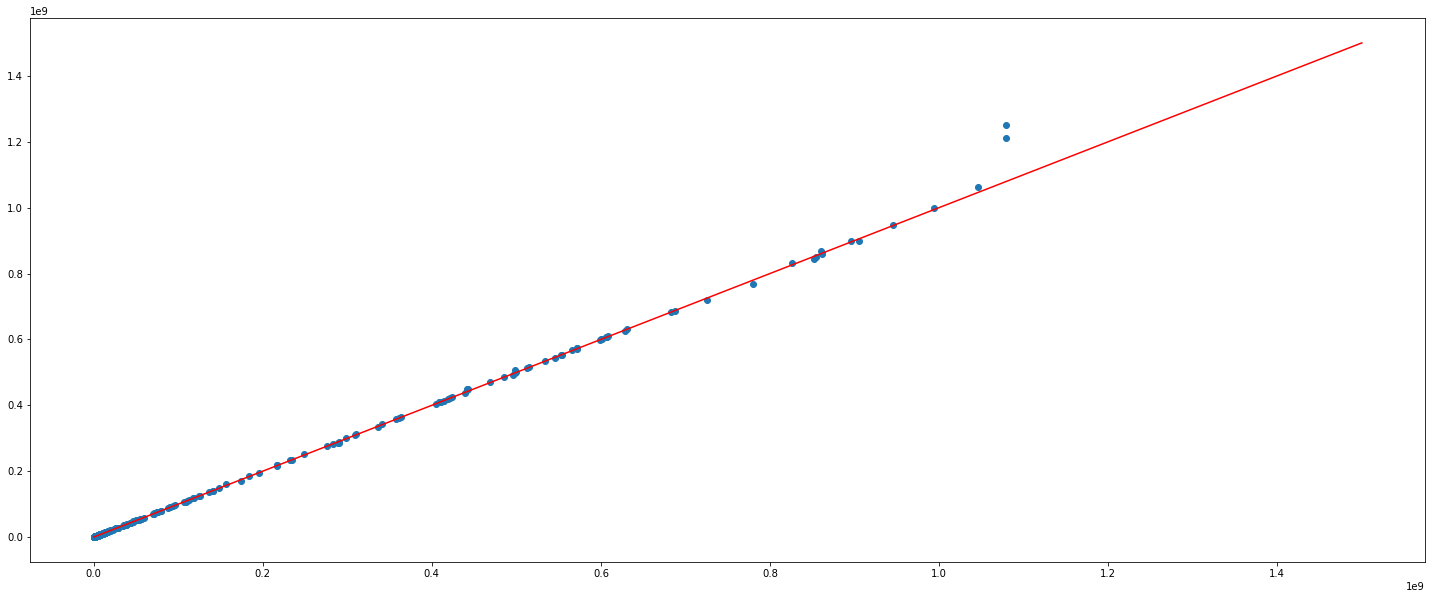

In [39]:
x = [0, 1.5e9]  
y = [0, 1.5e9] 

plt.figure(figsize=(25,10))
plt.scatter(y_pred_rfr, y_test)
plt.plot(x, y, c='r')
plt.show()

3. Linear Regression

In [30]:
model_lr = LinearRegression()
model_lr.fit(x_train,y_train)

LinearRegression()

In [31]:
y_pred_lr = model_lr.predict(x_test)

In [32]:
# Model Validation
# 1. R2 score
r = r2_score(y_test,y_pred_lr)

# 2. MAPE
#Mean absolute percentage error
m = mean_absolute_percentage_error(y_pred_lr, y_test)

print("Linear Regression")
print("R2 Score-- ", r)
print("MAPE-- ", m)

Linear Regression
R2 Score--  1.0
MAPE--  0.014906614733281809


In [ ]:
with open('model_lr_crop','wb') as f:
    pickle.dump(model_lr,f)

In [ ]:
y_pred_lr.shape

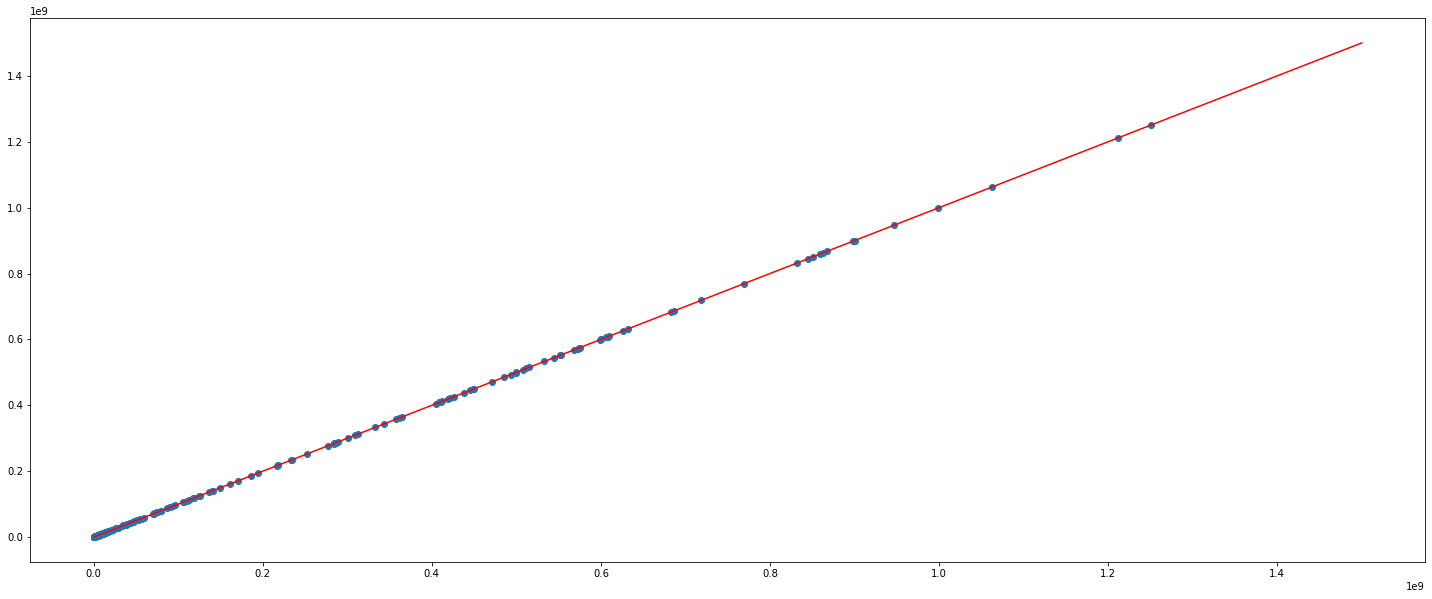

In [33]:
x = [0, 1.5e9]  
y = [0, 1.5e9] 

plt.figure(figsize=(25,10))
plt.scatter(y_pred_lr, y_test)
plt.plot(x, y, c='r')
plt.show()

In [ ]:
sns.lineplot(y_pred_lr, y_test)